# MetPy Basic Sounding with University of Wyoming Upper Air




<br>
<div style="float:right; width:98px; height:90px">
<img src="
https://unidata.github.io/MetPy/latest/_static/metpy_150x150.png"> 
</div>

 


# Plotting of Univeristy of Wyoiming Upper Air Data
<div style="float:right; width:45px; height:128px">
<img src="
https://gowyo.com/images/main_logo.png"> 
<br>
</div>


Read in raw data for specific time and station (List in Notebook down below)

In [2]:
from datetime import datetime
import matplotlib.pyplot as plt
import metpy.plots as plots
from metpy.units import units
%matplotlib inline
import metpy.calc as mpcalc
from siphon.simplewebservice.wyoming import WyomingUpperAir
import numpy as np
import metpy.calc as mcalc
import os

/Users/chowdahead/miniconda3/lib/python3.7/site-packages/bs4/element.py:16: UserWarning: The soupsieve package is not installed. CSS selectors cannot be used.
  'The soupsieve package is not installed. CSS selectors cannot be used.'


In [3]:
# Uncommment for archived date
#now = datetime(2019,2,23,12) 

# Set today's date for search and naming purposes
now = datetime.now() 
dateCurrent = datetime(int('{0:%Y}'.format(now)),int('{0:%m}'.format(now)),int('{0:%d}'.format(now)),12)

print(dateCurrent)

# Make a string for YYYYMMDD for naming saved figure later
date = str(dateCurrent)[0:4]+str(dateCurrent)[5:7]+str(dateCurrent)[8:10]+str(dateCurrent)[11:13]
print(date)

# Set a path to save the plots with string format for the date to set the month and day 
im_save_path ="/Users/chowdahead/Desktop/Weather_Blog/"+'{0:%m_%d}'.format(dateCurrent)+"/"
print(im_save_path)

# Check to see if the folder already exists, if not create it
if not os.path.isdir(im_save_path):
    os.makedirs(im_save_path)

# Uncomment if you want to automatically change to the map folder    
#os.chdir(im_save_path)

2019-03-08 12:00:00
2019030812
/Users/chowdahead/Desktop/Weather_Blog/03_08/


![](http://weather.uwyo.edu/upperair/naconf.jpg)

In [5]:
StationsList = ["Wallops Island, VA","Upton, NY","Chatham, MA","Albany, NY","Sterling, VA","Gray, ME",\
"Buffalo, NY","Pittsburgh, PA","Wilmington, OH","White Lake, MI","Blacksburg, VA","Greensboro, NC",\
"Newport, NC","Charleston, SC","Jacksonville, FL","Tampa Bay, FL","Miami, FL","Tallahassee, FL",\
"Shelby Cnty. Airport, AL","Peachtree City, GA","Nashville, TN","Gaylord, MI","Green Bay, WI","Davenport, IA",\
"Lincoln, IL","Springfield, MO","Little Rock, AR","Jackson Thomas, MS","Slidell Muni., LA","Lake Charles, LA",\
"Shreveport, LA","Norman, OK","Dodge City, KS","Topeka, KS","Omaha, NE","Chanhassen, MN","International Falls, MN",\
"Aberdeen, SD","Bismarck, ND","Rapid City, SD","North Platte, NE","Amarillo, TX","Midland, TX","Del Rio, TX",\
"Corpus Christi, TX","Brownsville, TX","Ft. Worth, TX","Santa Teresa, NM","Albuquerque, NM","Denver, CO","Grand Juncion, CO",\
"Riverton, WY","Glasgow, MT","Great Falls, MT","Salt Lake City, UT","Flagstaff, AZ","Tuscon, AZ","Yuma Prarie Grnds, AZ","Las Vegas, NV",\
"Elko, NV","Boise, ID","Spokane, WA","Quillayute, WA","Salem, OR","Medford, OR","Reno, NV",\
"Oakland, CA","Vandenberg Air Force Base, CA","San Diego, CA"]

StationNumList = [72402,72501,74494,72518,72403,74389,72528,72520,72426,72632,72318,72317,72305,72208,72206,72210,\
72202,72214,72230,72215,72327,72635,72645,74455,74560,72440,72340,72235,72233,72240,72248,72357,72451,72456,\
72558,72649,72747,72659,72764,72662,72562,72363,72265,72261,72251,72250,72249,72364,72365,72469,72476,72672,\
72768,72776,72572,72376,72274,74004,72388,72582,72681,72786,72797,72694,72597,72489,72493,72393,72293]

StationFinal = dict(zip(StationsList,StationNumList))

In [6]:
Stations = ["WAL","OKX","CHH","ALB","IAD","GYX",\
"BUF","PIT","ILN","DTX","RNK","GSO",\
"MHX","CHS","JAX","TBW","MFL","TLH",\
"SBMX","FFC","BNA","APX","GRB","DVN",\
"ILX","SGF","LZK","JAN","LIX","LCH",\
"SHV","OUN","DDC","TOP","OAX","MPX","INL",\
"ABR","BIS","RAP","LBF","AMA","MAF","DRT",\
"CRP","BRO","FWD","EPZ","ABQ","DNR","GJT",\
"RIW","GGW","TFX","SLC","FGZ","TUS","1Y7","VEF",\
"LKN","BOI","OTX","UIL","SLE","MFR","REV",\
"OAK","VBG","NKY"]

StationsName = ["Wallops Island, VA","Upton, NY","Chatham, MA","Albany, NY","Sterling, VA","Gray, ME",\
"Buffalo, NY","Pittsburgh, PA","Wilmington, OH","White Lake, MI","Blacksburg, VA","Greensboro, NC",\
"Newport, NC","Charleston, SC","Jacksonville, FL","Tampa Bay, FL","Miami, FL","Tallahassee, FL",\
"Shelby Cnty. Airport, AL","Peachtree City, GA","Nashville, TN","Gaylord, MI","Green Bay, WI","Davenport, IA",\
"Lincoln, IL","Springfield, MO","Little Rock, AR","Jackson Thomas, MS","Slidell Muni., LA","Lake Charles, LA",\
"Shreveport, LA","Norman, OK","Dodge City, KS","Topeka, KS","Omaha, NE","Chanhassen, MN","International Falls, MN",\
"Aberdeen, SD","Bismarck, ND","Rapid City, SD","North Platte, NE","Amarillo, TX","Midland, TX","Del Rio, TX",\
"Corpus Christi, TX","Brownsville, TX","Ft. Worth, TX","Santa Teresa, NM","Albuquerque, NM","Denver, CO","Grand Junction, CO",\
"Riverton, WY","Glasgow, MT","Great Falls, MT","Salt Lake City, UT","Flagstaff, AZ","Tuscon, AZ","Yuma Prarie Grnds, AZ","Las Vegas, NV",\
"Elko, NV","Boise, ID","Spokane, WA","Quillayute, WA","Salem, OR","Medford, OR","Reno, NV",\
"Oakland, CA","Vandenberg Air Force Base, CA","San Diego, CA"]

StationFinal = dict(zip(Stations,StationsName))

In [7]:
# Lets take a look at Denver, DNR
station = 'DNR'
#station = "FGZ"
station2 = 'GJT'
#station = raw_input("Which station? ")

In [8]:
def Mapperz(dateCurrent,station,date,im_save_path,CIN_CAPE=None):
    dateCurrent_db = WyomingUpperAir.request_data(dateCurrent,station)
    p = dateCurrent_db["pressure"].values * units(dateCurrent_db.units["pressure"])
    
    # We can essentially take a slice of the data as a mask variable
    mask = p >= 100 * units.hPa
    
    # Set our variables
    T = dateCurrent_db["temperature"].values * units(dateCurrent_db.units["temperature"])
    Td = dateCurrent_db["dewpoint"].values * units(dateCurrent_db.units["dewpoint"])
    u = dateCurrent_db["u_wind"].values * units(dateCurrent_db.units["u_wind"])
    v = dateCurrent_db["v_wind"].values * units(dateCurrent_db.units["v_wind"])
    
    # We can plot on specific intervals for wind barb location:
    interval = np.logspace(2,3)*units.hPa
    idx = mcalc.resample_nn_1d(p,interval)
    
    # Dew Point
    td = dateCurrent_db["dewpoint"].values
    t_min = td.min()

    # Ambient Temperature
    t = dateCurrent_db["temperature"].values
    t_max = t.max()
    
    # Create new figure
    fig = plt.figure(figsize=(10,10))

    # Create the new skew-T figure
    skew = plots.SkewT(fig)

    # Plot Temperatures (red) and Dew Pt. (green)
    skew.plot(p,T,"red")
    skew.plot(p,Td,"green")

    # Set extent for both axes
    skew.ax.set_ylim(1000,100)
    skew.ax.set_xlim(-60, 60)



    #skew.ax.set_xlim(-65,t_max+15)
    #skew.ax.set_xlim(t_min+30,t_max+15)

    #skew.plot_barbs(p2[mask],u[mask],v[mask])
    #skew.plot_barbs(p2[mask][::5],u[mask][::5],v[mask][::5])
    skew.plot_barbs(p[idx][::2],u[idx][::2],v[idx][::2])


    # Calculate full parcel profile and add to plot as black line
    lcl_pressure, lcl_temperature = mpcalc.lcl(p[0], T[0], Td[0])
    prof = mcalc.parcel_profile(p, T[0], Td[0]).to('degC')
    skew.plot(p, prof, 'k', linewidth=2)
    #skew.plot(p, parcel_prof, 'k', linewidth=2)


    # Thermodynamic lines
    skew.plot_dry_adiabats(alpha=0.4)
    skew.plot_moist_adiabats(alpha=0.4)
    skew.plot_mixing_lines(alpha=0.6)

    skew.plot(lcl_pressure, lcl_temperature, 'ko', markerfacecolor='black')

    # Shade areas of CAPE and CIN
    if CIN_CAPE == True:
        
        skew.shade_cin(p, T, prof)
        #skew.shade_cape(p, T, prof)
    
    # An example of a slanted line at constant T -- in this case the 0
    # isotherm
    skew.ax.axvline(0, color='c', linestyle='--', linewidth=2)

    # Add logos
    plots.add_metpy_logo(fig, x=57, y=45, size='small')
    plots.add_unidata_logo(fig, x=58, y=510, size='small')

    # Plot title
    plt.title(StationFinal[station]+"  "+str(dateCurrent)+"Z", fontsize=25)

    # Label axes
    plt.xlabel(r'Temperature:   ($^{o}$C)', fontsize='large', fontweight='bold')
    plt.ylabel(r'Pressure:   (hPa)', fontsize='large', fontweight='bold')

    plt.show()
    # Save figure to desired location on computer
    fig.savefig(im_save_path+"Sounding_"+station+"_"+date+".png",bbox_inches='tight')
    plt.close(fig)
    return 

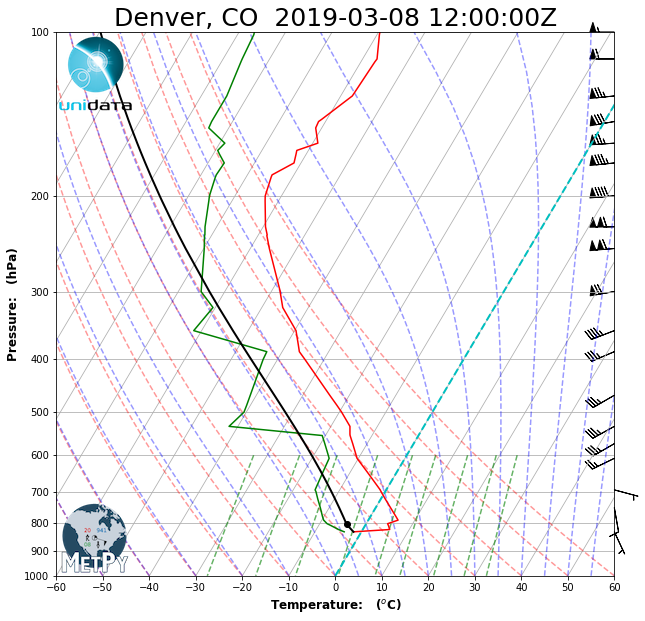

In [9]:
Mapperz(dateCurrent,"DNR",date,im_save_path,False)